### __Question 3__ ###
 Q1. Assume a 2D Grid of constrained straight interlocking paths with well defined start and end points. What metric should you use to compare distances between any two different paths? Why is it better than other metrics available? List out some of the other metrics.



---
I will be using __Manhattan Distance__ which is the sum of absolute differences between points across all the dimensions.<br>
__Distance = ∣x₁ − x₂∣ + ∣y₁ − y₂∣__
<br>


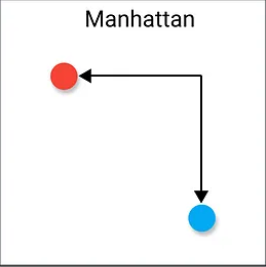<br>
<br>
Pros of Manhattan Distance are :


*   __Simplicity__: It is easy to compute and understand.
*   __Grid Alignment__: Paths are constrained to straight interlocking lines, similar to a grid. Therefore, Manhattan Distance naturally aligns with the movement allowed in this grid, making it an appropriate metric for path comparison.
*   __Directional Independence__: It accurately captures the essence of grid-based movement, reflecting the actual steps required to traverse from one point to another in a grid.
<br>
<br>
Cons of Manhattan Distance are :

*  __Less Realistic for Diagonal Paths__: When diagonal movement is allowed or indirectly considered (such as by summing horizontal and vertical moves), the Manhattan Distance may underestimate the actual effort required compared to metrics that consider straight-line distances. But in our question it is not allowed due to straight interlocking paths.



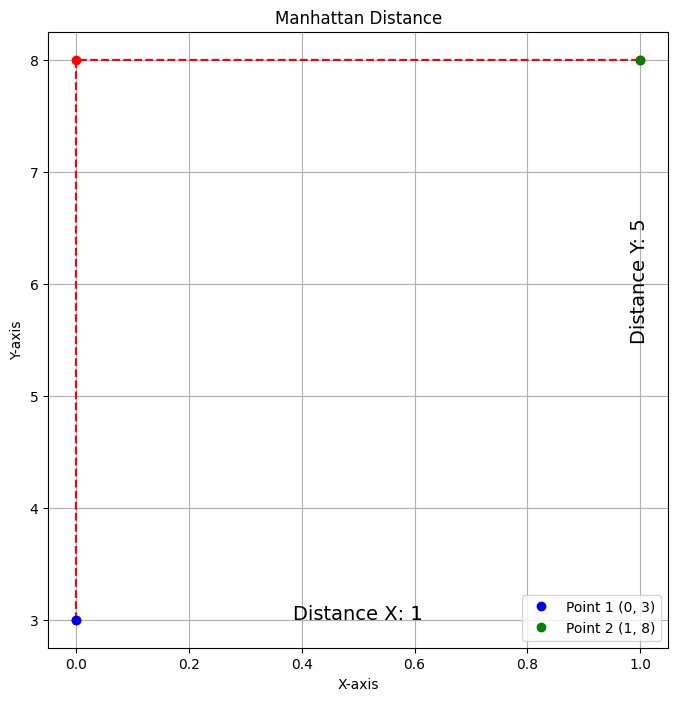

Manhattan Distance between (0, 3) and (1, 8): 6


In [1]:
import matplotlib.pyplot as plt

# Coordinates of the points
x1, y1 = 0, 3
x2, y2 = 1, 8


manhattan_dist = abs(x1 - x2) + abs(y1 - y2)

# Plotting the points
plt.figure(figsize=(8, 8))
plt.plot([x1, x1, x2], [y1, y2, y2], 'ro--')
plt.plot(x1, y1, 'bo', label=f'Point 1 ({x1}, {y1})')  # blue circle -> Point 1
plt.plot(x2, y2, 'go', label=f'Point 2 ({x2}, {y2})')  # green circle -> Point 2


plt.text((x1 + x2) / 2, y1, f'Distance X: {abs(x1 - x2)}', fontsize=14, ha='center')
plt.text(x2, (y1 + y2) / 2, f'Distance Y: {abs(y1 - y2)}', fontsize=14, ha='center', rotation=90)


plt.title('Manhattan Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

plt.show()

print(f'Manhattan Distance between ({x1}, {y1}) and ({x2}, {y2}): {manhattan_dist}')


The other metrics used to compare distances are:-


1.   __Euclidean Distance__ : In mathematics, the Euclidean distance between two points in Euclidean space is the length of the line segment between them.<br>
__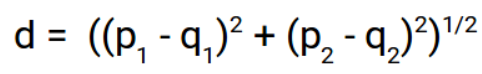
<br><br>
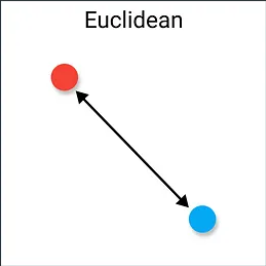
<br><br>
2.   __Minkowski Distance__ : This distance metric is a generalization of the Euclidean and Manhattan distance metrics. It determines the similarity of distances between two or more vectors in space. In machine learning, the distance metric calculated from the Minkowski equation is applied to determine the similarity of size.<br><br>
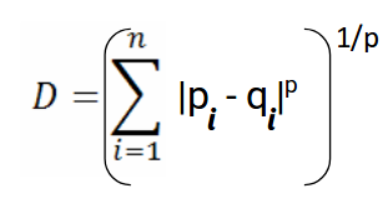
<br><br>
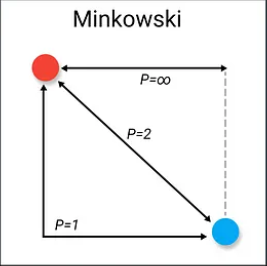
<br><br>
3. __Hamming Distance__ : Hamming Distance measures the similarity between two strings of the same length. The Hamming Distance between two strings of the same length is the number of positions at which the corresponding characters are different. <br><br>
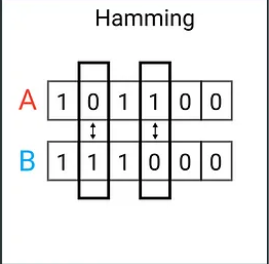


Resources used:<br>

1.   Resource_1_url=(https://stackoverflow.com/questions/15179481/how-to-calculate-distance-between-2-points-in-a-2d-matrix)
2.   Resource_2_url=(https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)
3.   Resource_3_url=(https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)
4. Resource_4_url=(https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7)



Q2. While researching on Transformers you learn about embeddings and how words are transformed into Numerical Vectors of High dimensional space, and stored on what basis the ‘likeliness’ of any two vectors are. For eg. words like ‘happiness’, ‘success’ are more alike to each other on the contrary ‘sadness’ , ‘failure’ are alike to each other but opposite to
 ‘happiness’, ‘success’ .


*   What is the common criterion used to define this ‘likeliness’ mathematically between any two words?
* Hint : In Higher Dimensional Spaces euclidean distances fall short !
Generate a corpus of words then convert these words into embeddings then using this criterion plot these embeddings in 3D space (for simplicity).
* Use any Relevant Python Libraries to do the computations and metric definitions. Use Plotly.js Python Library to generate the visualizations.






---
While searching across many methods I found out that __Cosine Similarity__ is the most appropriate way to define the likeliness of some word with the other.The size of the word doesn't matter while using this method.<br>
Definition: Cosine similarity is a mathematical measure that calculates the cosine of the angle between two vectors. It is commonly used to determine the similarity in direction between the vectors, regardless of their magnitude.<br>
__How it is used in word embeddings__ <br>
In word embeddings, where each word is represented as a vector in a high-dimensional space, cosine similarity is favored over Euclidean distance due to its ability to handle the challenges posed by high-dimensional spaces, such as the curse of dimensionality.

### __Cosine Similarity__

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} \tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index $i$ of that vector.

- Note that if $A$ and $B$ are identical, you will get $\cos(\theta) = 1$.
- Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $\cos(\theta) = -1$.
- If you get $\cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
- Numbers between 0 and 1 indicate a similarity score.
- Numbers between -1 and 0 indicate a dissimilarity score.


In [12]:
!pip install gensim plotly scikit-learn


In [13]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from gensim.models import KeyedVectors
import gensim.downloader as api

In [15]:
# Step 1: Generate a Corpus of Words
corpus = ["happiness", "success", "joy", "sadness", "failure", "misery", "love", "hate", "peace", "war", "apple", "orange", "human"]


In [16]:
# Step 2: Load pre-trained Word2Vec vectors from Google News
word2vec = api.load('word2vec-google-news-300')

# Filter the embeddings for the words in the corpus
word_embeddings = np.array([word2vec[word] for word in corpus])

# Normalize the vectors for increased accuracy in cosine similarity
def normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

word_embeddings_normalized = normalize(word_embeddings)


In [19]:
# Calculate and print cosine similarity
def cosine_similarity(word_1, word_2):
    return np.dot(word_1, word_2)

cosine_similarities = {}
for i, word1 in enumerate(corpus):
    for j, word2 in enumerate(corpus):
        if i < j:  # To avoid duplicate pairs and self-comparison
            similarity = cosine_similarity(word_embeddings_normalized[i], word_embeddings_normalized[j])
            cosine_similarities[(word1, word2)] = similarity


# Print the cosine similarities
for pair, similarity in cosine_similarities.items():
    print(f"Cosine similarity between {pair[0]} and {pair[1]}: {similarity:.4f}")

# Step 3: Reduce Dimensionality for Visualization
pca = PCA(n_components=3)
word_embeddings_3d = pca.fit_transform(word_embeddings_normalized)

Cosine similarity between happiness and success: 0.2915
Cosine similarity between happiness and joy: 0.6183
Cosine similarity between happiness and sadness: 0.4267
Cosine similarity between happiness and failure: 0.1047
Cosine similarity between happiness and misery: 0.3701
Cosine similarity between happiness and love: 0.4503
Cosine similarity between happiness and hate: 0.2162
Cosine similarity between happiness and peace: 0.3892
Cosine similarity between happiness and war: 0.1149
Cosine similarity between happiness and apple: 0.0787
Cosine similarity between happiness and orange: 0.0545
Cosine similarity between happiness and human: 0.2350
Cosine similarity between success and joy: 0.2600
Cosine similarity between success and sadness: 0.0796
Cosine similarity between success and failure: 0.3241
Cosine similarity between success and misery: 0.1587
Cosine similarity between success and love: 0.1936
Cosine similarity between success and hate: 0.0737
Cosine similarity between success and

In [22]:
# Step 4: Plot the Embeddings in 3D Space using Plotly
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

scatter = go.Scatter3d(
    x=word_embeddings_3d[:, 0],
    y=word_embeddings_3d[:, 1],
    z=word_embeddings_3d[:, 2],
    mode='markers+text',
    text=corpus,
    marker=dict(size=8, color=np.arange(len(corpus)), colorscale='Viridis', opacity=0.8)
)

fig.add_trace(scatter)


### __References used are__:
1) github_repo_url: (https://github.com/KarenJF/deeplearing_nlp/blob/master/c1_nlp_classification_vec_spaces/week3/C1_W3_Assignment.ipynb)<br>
2) video_url: (https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture)<br>
3) Url: (https://encord.com/blog/embeddings-machine-learning/) <br>
4) __ChatGPT__ : I took help of chatgpt do make use library ploty.js (i.e. is 3d plotting) specifically and to figure out some bugs.